In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df= pd.read_csv("D:/Grand Project/maqsab.csv")

In [3]:
df.shape

(57096, 12)

In [4]:
df.head()

,order_id,order_placement_date,customer_id,retailer_name,city,product_Category,product_Name,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty
0,FMR35102603,04/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,228,05/03/2022,05/03/2022,182
1,FMR38102503,06/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,219,08/03/2022,08/03/2022,219
2,FMR39102502,06/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,160,09/03/2022,10/03/2022,160
3,FMR310102601,09/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,109,10/03/2022,10/03/2022,109
4,FMR311102502,10/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,160,11/03/2022,10/03/2022,160


In [5]:
df.columns

Index(['order_id', 'order_placement_date', 'customer_id', 'retailer_name',
       'city', 'product_Category', 'product_Name', 'product_id', 'order_qty',
       'agreed_delivery_date', 'actual_delivery_date', 'delivery_qty'],
      dtype='object')

In [6]:
df.dtypes

order_id                object
order_placement_date    object
customer_id              int64
retailer_name           object
city                    object
product_Category        object
product_Name            object
product_id               int64
order_qty                int64
agreed_delivery_date    object
actual_delivery_date    object
delivery_qty             int64
dtype: object

In [7]:
df.describe()


,customer_id,product_id,order_qty,delivery_qty
count,57096.000000,5.709600e+04,57096.000000,57096.000000
mean,789427.216005,2.589135e+07,235.164215,227.146508
std,224.254353,1.707018e+02,141.001784,137.109465
min,789101.000000,2.589110e+07,20.000000,16.000000
25%,789220.000000,2.589120e+07,111.000000,106.000000
50%,789420.000000,2.589130e+07,207.000000,200.000000
75%,789603.000000,2.589150e+07,361.000000,347.000000
max,789903.000000,2.589160e+07,500.000000,500.000000


In [8]:
df.describe( include= object)

,order_id,order_placement_date,retailer_name,city,product_Category,product_Name,agreed_delivery_date,actual_delivery_date
count,57096,57096,57096,57096,57096,57096,57096,57096
unique,31729,183,16,3,3,18,183,187
top,FMR323221602,13/06/2022,RedStores,Suez,Dairy,AM Butter 500,15/03/2022,16/04/2022
freq,9,364,4965,21133,38096,3272,343,356


In [9]:
df.drop(['order_id'], axis=1)

,order_placement_date,customer_id,retailer_name,city,product_Category,product_Name,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty
0,04/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,228,05/03/2022,05/03/2022,182
1,06/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,219,08/03/2022,08/03/2022,219
2,06/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,160,09/03/2022,10/03/2022,160
3,09/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,109,10/03/2022,10/03/2022,109
4,10/03/2022,789102,RedStores,Alex,Food,AM Biscuits 500,25891502,160,11/03/2022,10/03/2022,160
...,...,...,...,...,...,...,...,...,...,...,...
57091,23/08/2022,789621,ExpertMart,Alex,Dairy,AM Ghee 100,25891303,42,24/08/2022,24/08/2022,42
57092,25/08/2022,789621,ExpertMart,Alex,Dairy,AM Ghee 100,25891303,28,28/08/2022,28/08/2022,22
57093,26/08/2022,789621,ExpertMart,Alex,Dairy,AM Ghee 100,25891303,25,27/08/2022,27/08/2022,23
57094,27/08/2022,789621,ExpertMart,Alex,Dairy,AM Ghee 100,25891303,40,29/08/2022,29/08/2022,36


In [10]:
df['product_Category'].value_counts()

product_Category
Dairy        38096
Food          9539
Beverages     9461
Name: count, dtype: int64

Text(0, 0.5, 'performence/count')

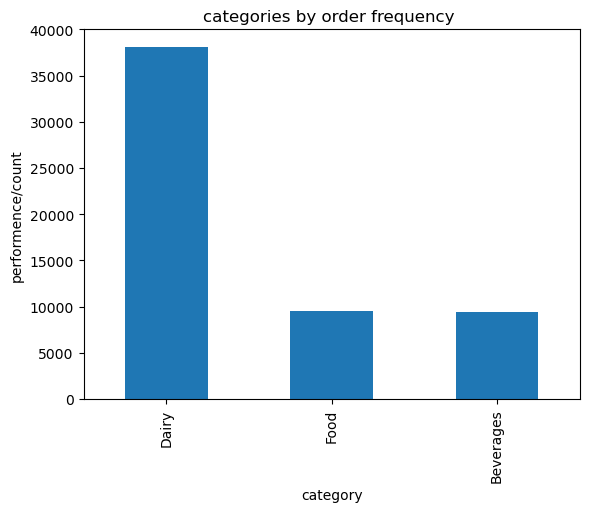

In [11]:
bar_chart= df['product_Category'].value_counts()\
    .head()\
    .plot(kind='bar', title='categories by order frequency ')
bar_chart.set_xlabel('category')
bar_chart.set_ylabel('performence/count')


In [12]:
cat_qty = df.groupby('product_Category')[['order_qty', 'delivery_qty']].sum().reset_index()
print (cat_qty)

  product_Category  order_qty  delivery_qty
0        Beverages    1183744       1142822
1            Dairy   10564711      10204241
2             Food    1678481       1622094


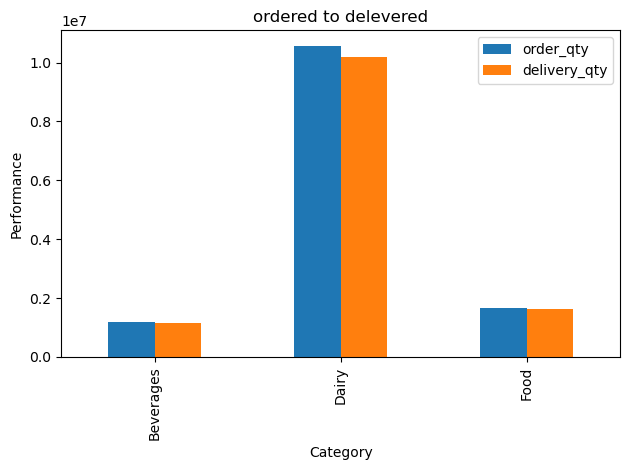

In [13]:
cat_chart = cat_qty.set_index('product_Category').head()\
    .plot(kind='bar', title='ordered to delevered')
cat_chart.set_xlabel('Category')
cat_chart.set_ylabel('Performance')
plt.tight_layout() 
plt.show()


In [14]:
total_qty = df[['order_qty', 'delivery_qty']].sum()

difference = total_qty['order_qty'] - total_qty['delivery_qty']

result = pd.DataFrame({
    'Total Order ': [total_qty['order_qty']],
    'Total Delivery ': [total_qty['delivery_qty']],
    'Difference': [difference]
})
result.reset_index()
print(result)

   Total Order   Total Delivery   Difference
0      13426936         12969157      457779


In [15]:
df['product_Name'].value_counts()

product_Name
AM Butter 500      3272
AM Ghee 150        3209
AM Ghee 250        3200
AM Milk 250        3197
AM Biscuits 500    3195
AM Curd 50         3187
AM Biscuits 250    3186
AM Tea 500         3184
AM Milk 100        3184
AM Curd 100        3177
AM Butter 100      3170
AM Biscuits 750    3158
AM Tea 250         3143
AM Milk 500        3139
AM Curd 250        3138
AM Tea 100         3134
AM Butter 250      3125
AM Ghee 100        3098
Name: count, dtype: int64

Text(0, 0.5, 'performence')

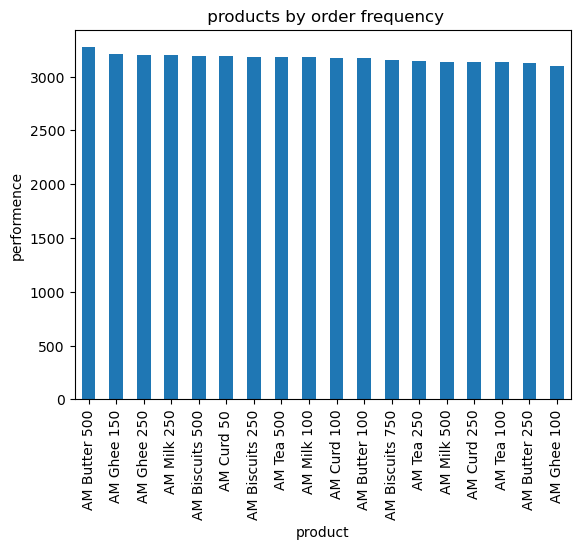

In [16]:
bar_chart2= df['product_Name'].value_counts()\
.head(18)\
.plot(kind='bar' , title= ' products by order frequency')
bar_chart2.set_xlabel('product')
bar_chart2.set_ylabel('performence')

In [17]:
Qty= df.groupby('product_Name')[['order_qty','delivery_qty']].sum().reset_index()
print (Qty)

       product_Name  order_qty  delivery_qty
0   AM Biscuits 250     563366        544093
1   AM Biscuits 500     558119        538535
2   AM Biscuits 750     556996        539466
3     AM Butter 100     943483        911300
4     AM Butter 250     933107        899151
5     AM Butter 500     983180        948395
6       AM Curd 100    1105336       1067987
7       AM Curd 250    1099401       1063337
8        AM Curd 50    1119256       1081421
9       AM Ghee 100     186186        179828
10      AM Ghee 150     193524        187121
11      AM Ghee 250     191494        184849
12      AM Milk 100    1276190       1231979
13      AM Milk 250    1279132       1235779
14      AM Milk 500    1254422       1213094
15       AM Tea 100     394712        381239
16       AM Tea 250     392461        378817
17       AM Tea 500     396571        382766


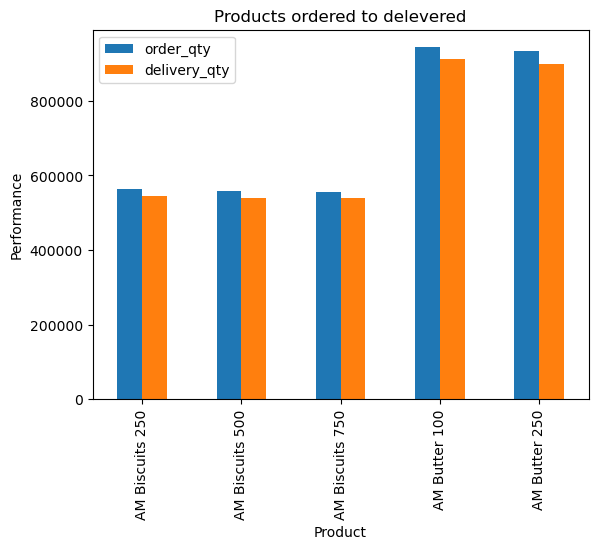

In [18]:
pro_chart = Qty.set_index('product_Name').head()\
    .plot(kind='bar', title='Products ordered to delevered')
pro_chart.set_xlabel('Product')
pro_chart.set_ylabel('Performance')
plt.show()

In [19]:
city_qty = df.groupby('city')[['order_qty', 'delivery_qty']].sum().reset_index()
print (city_qty)

       city  order_qty  delivery_qty
0      Alex    4213809       4074961
1  Damietta    4244165       4086006
2      Suez    4968962       4808190


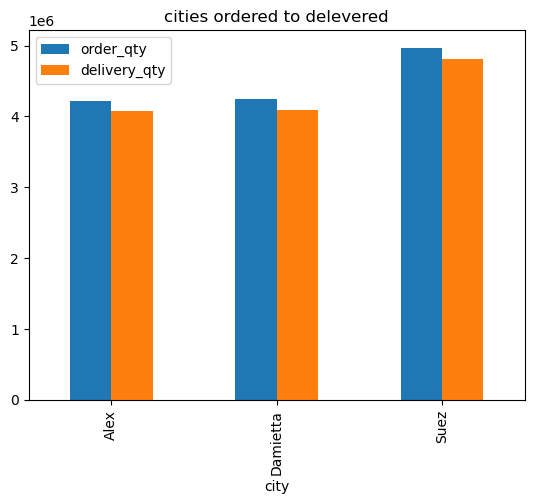

In [20]:
city_chart = city_qty.set_index('city').head()\
    .plot(kind='bar', title='cities ordered to delevered')
pro_chart.set_xlabel('city')
pro_chart.set_ylabel('Performance')
plt.show()

0        3
1        3
2        3
3        3
4        3
        ..
57091    8
57092    8
57093    8
57094    8
57095    8
Name: month, Length: 57096, dtype: int32


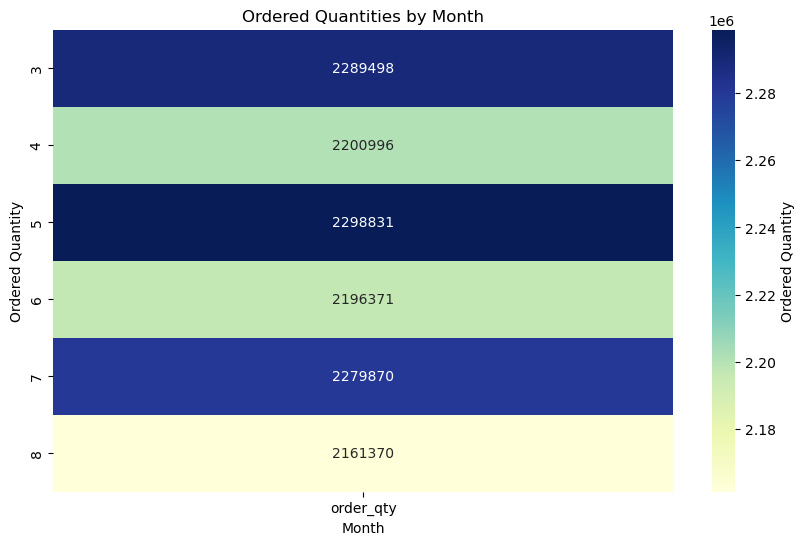

In [33]:

df['order_placement_date'] = pd.to_datetime(df['order_placement_date'], format='%d/%m/%Y')
df['month'] = df['order_placement_date'].dt.month
print(df['month'])
df.reset_index(drop=True, inplace=True)
monthly_data = df.groupby('month')['order_qty'].sum().reset_index()
monthly_data.set_index('month', inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Ordered Quantity'})
plt.title('Ordered Quantities by Month')
plt.xlabel('Month')
plt.ylabel('Ordered Quantity')

plt.show()